In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bim_ai_civil_engineering_dataset.csv")
df.head()


,Project_ID,Project_Type,Location,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,...,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage,Risk_Level
0,PJT_1,Tunnel,Houston,01-01-2020,26-09-2021,12260784,1.505450e+07,2.793720e+06,699,813.914852,...,25202.99469,244.843310,6602,76.300184,8,6.192198,52.988330,0,95.006343,High
1,PJT_2,Dam,Houston,02-01-2020,06-12-2020,2369277,3.507054e+06,1.137777e+06,269,384.118221,...,49066.17254,263.123025,7121,63.527671,5,2.134473,50.885745,0,25.294824,Low
2,PJT_3,Building,Houston,03-01-2020,05-12-2021,23299783,2.169213e+07,-1.607656e+06,899,1081.777915,...,48192.54716,608.985023,9956,47.099444,2,3.113728,93.905836,0,97.478830,Medium
3,PJT_4,Dam,Houston,04-01-2020,12-04-2022,24499306,2.946966e+07,4.970354e+06,809,974.565655,...,19811.15175,673.574344,3725,86.846394,5,4.070101,90.454316,1,95.098131,High
4,PJT_5,Dam,Seattle,05-01-2020,12-02-2022,1749971,2.329338e+06,5.793670e+05,354,347.990127,...,44866.56517,765.476122,4368,61.827163,6,2.759351,78.391069,0,43.624985,Low


In [2]:
df.shape

(1000, 28)

In [3]:
df[["Start_Date", "End_Date"]].dtypes

Start_Date    object
End_Date      object
dtype: object

In [4]:
df["Start_Date"] = pd.to_datetime(df["Start_Date"], dayfirst=True)
df["End_Date"]   = pd.to_datetime(df["End_Date"], dayfirst=True)

In [5]:
df[["Start_Date", "End_Date"]].head()

,Start_Date,End_Date
0,2020-01-01,2021-09-26
1,2020-01-02,2020-12-06
2,2020-01-03,2021-12-05
3,2020-01-04,2022-04-12
4,2020-01-05,2022-02-12


In [6]:
df["Computed_Duration"] = (df["End_Date"] - df["Start_Date"]).dt.days

df[["Planned_Duration", "Actual_Duration", "Computed_Duration"]].head()

,Planned_Duration,Actual_Duration,Computed_Duration
0,699,813.914852,634
1,269,384.118221,339
2,899,1081.777915,702
3,809,974.565655,829
4,354,347.990127,769


In [7]:
df["Risk_Level"].value_counts()

Risk_Level
High      502
Medium    342
Low       156
Name: count, dtype: int64

In [11]:
df["Duration_Days"] = (df["End_Date"] - df["Start_Date"]).dt.days
df["Duration_Weeks"] = (df["Duration_Days"] / 7).astype(int)
df[["Duration_Days", "Duration_Weeks"]].describe()

,Duration_Days,Duration_Weeks
count,1000.000000,1000.000000
mean,556.225000,79.024000
std,204.748402,29.254491
min,180.000000,25.000000
25%,381.750000,54.000000
50%,571.500000,81.000000
75%,738.000000,105.000000
max,897.000000,128.000000


In [12]:
def expand_project_to_weekly(row):
    weeks = max(row["Duration_Weeks"], 4)  # minimum 4 weeks
    
    dates = pd.date_range(
        start=row["Start_Date"],
        periods=weeks,
        freq="W"
    )
    
    ts = pd.DataFrame({
        "Date": dates,
        "Project_ID": row["Project_ID"]
    })
    
    # ---- COST EVOLUTION ----
    ts["Planned_Cost"] = np.linspace(0, row["Planned_Cost"], weeks)
    ts["Actual_Cost"] = np.linspace(0, row["Actual_Cost"], weeks) \
                        + np.random.normal(0, row["Actual_Cost"] * 0.02, weeks)
    
    # ---- PROGRESS ----
    ts["Planned_Progress"] = np.linspace(0, 100, weeks)
    ts["Actual_Progress"] = ts["Planned_Progress"] \
                            - np.random.normal(0, 4, weeks)
    
    # ---- STRUCTURAL HEALTH ----
    ts["Vibration_Level"] = row["Vibration_Level"] \
                            + np.random.normal(0, 0.15, weeks)
    
    ts["Crack_Width"] = row["Crack_Width"] \
                        + np.random.normal(0, 0.05, weeks)
    
    # ---- ENVIRONMENT ----
    ts["Temperature"] = row["Temperature"] \
                        + np.random.normal(0, 2, weeks)
    
    ts["Humidity"] = row["Humidity"] \
                     + np.random.normal(0, 5, weeks)
    
    # ---- RESOURCES ----
    ts["Labor_Hours"] = (row["Labor_Hours"] / weeks) \
                        + np.random.normal(0, 6, weeks)
    
    ts["Equipment_Utilization"] = row["Equipment_Utilization"] \
                                  + np.random.normal(0, 4, weeks)
    
    # ---- RISK (propagated, not predicted yet) ----
    ts["Risk_Level"] = row["Risk_Level"]
    
    return ts


In [13]:
weekly_ts_df = pd.concat(
    df.apply(expand_project_to_weekly, axis=1).tolist(),
    ignore_index=True
)

weekly_ts_df.head()


,Date,Project_ID,Planned_Cost,Actual_Cost,Planned_Progress,Actual_Progress,Vibration_Level,Crack_Width,Temperature,Humidity,Labor_Hours,Equipment_Utilization,Risk_Level
0,2020-01-05,PJT_1,0.000000,-407491.012897,0.000000,-0.677771,1.526918,2.920836,19.196892,51.180888,69.805903,74.678152,High
1,2020-01-12,PJT_1,137761.617978,51119.492303,1.123596,-7.432814,1.584483,2.791382,18.845070,41.026253,80.584834,73.369320,High
2,2020-01-19,PJT_1,275523.235955,362620.683548,2.247191,1.110690,1.453852,2.814901,18.024173,40.071256,67.091582,76.678539,High
3,2020-01-26,PJT_1,413284.853933,579147.826377,3.370787,3.294323,1.533286,2.851868,17.916870,54.675666,69.561126,78.130291,High
4,2020-02-02,PJT_1,551046.471910,989660.444114,4.494382,1.397148,1.349615,2.827027,21.440585,48.549559,59.099356,72.017383,High


In [14]:
weekly_ts_df[weekly_ts_df["Project_ID"] == 1].head(10)


,Date,Project_ID,Planned_Cost,Actual_Cost,Planned_Progress,Actual_Progress,Vibration_Level,Crack_Width,Temperature,Humidity,Labor_Hours,Equipment_Utilization,Risk_Level


In [16]:
weekly_ts_df.to_csv(
    "construction_weekly_timeseries.csv",
    index=False
)


In [22]:
ts_df = pd.read_csv(
    "construction_weekly_timeseries.csv",
    parse_dates=["Date"]
)


In [23]:
sns.set_style("whitegrid")

In [26]:
sample_project = ts_df["Project_ID"].iloc[0]
proj_df = ts_df[ts_df["Project_ID"] == sample_project]

proj_df.head()


,Date,Project_ID,Planned_Cost,Actual_Cost,Planned_Progress,Actual_Progress,Vibration_Level,Crack_Width,Temperature,Humidity,Labor_Hours,Equipment_Utilization,Risk_Level
0,2020-01-05,PJT_1,0.000000,-407491.012897,0.000000,-0.677771,1.526918,2.920836,19.196892,51.180888,69.805903,74.678152,High
1,2020-01-12,PJT_1,137761.617978,51119.492303,1.123596,-7.432814,1.584483,2.791382,18.845070,41.026253,80.584834,73.369320,High
2,2020-01-19,PJT_1,275523.235955,362620.683548,2.247191,1.110690,1.453852,2.814901,18.024173,40.071256,67.091582,76.678539,High
3,2020-01-26,PJT_1,413284.853933,579147.826377,3.370787,3.294323,1.533286,2.851868,17.916870,54.675666,69.561126,78.130291,High
4,2020-02-02,PJT_1,551046.471910,989660.444114,4.494382,1.397148,1.349615,2.827027,21.440585,48.549559,59.099356,72.017383,High


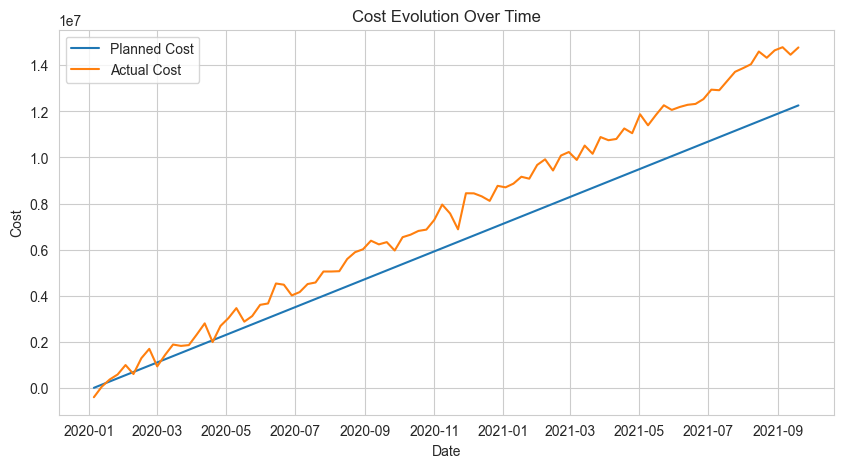

In [27]:
plt.figure(figsize=(10,5))
plt.plot(proj_df["Date"], proj_df["Planned_Cost"], label="Planned Cost")
plt.plot(proj_df["Date"], proj_df["Actual_Cost"], label="Actual Cost")
plt.xlabel("Date")
plt.ylabel("Cost")
plt.title("Cost Evolution Over Time")
plt.legend()
plt.show()


In [28]:
ts_df.sort_values(["Project_ID", "Date"], inplace=True)
ts_df.head()

,Date,Project_ID,Planned_Cost,Actual_Cost,Planned_Progress,Actual_Progress,Vibration_Level,Crack_Width,Temperature,Humidity,Labor_Hours,Equipment_Utilization,Risk_Level
0,2020-01-05,PJT_1,0.000000,-407491.012897,0.000000,-0.677771,1.526918,2.920836,19.196892,51.180888,69.805903,74.678152,High
1,2020-01-12,PJT_1,137761.617978,51119.492303,1.123596,-7.432814,1.584483,2.791382,18.845070,41.026253,80.584834,73.369320,High
2,2020-01-19,PJT_1,275523.235955,362620.683548,2.247191,1.110690,1.453852,2.814901,18.024173,40.071256,67.091582,76.678539,High
3,2020-01-26,PJT_1,413284.853933,579147.826377,3.370787,3.294323,1.533286,2.851868,17.916870,54.675666,69.561126,78.130291,High
4,2020-02-02,PJT_1,551046.471910,989660.444114,4.494382,1.397148,1.349615,2.827027,21.440585,48.549559,59.099356,72.017383,High


In [29]:
lag_features = [
    "Actual_Cost",
    "Actual_Progress",
    "Vibration_Level",
    "Labor_Hours"
]

for col in lag_features:
    ts_df[f"{col}_lag1"] = ts_df.groupby("Project_ID")[col].shift(1)
    ts_df[f"{col}_lag2"] = ts_df.groupby("Project_ID")[col].shift(2)


In [30]:
ts_df["Cost_rolling_3"] = (
    ts_df.groupby("Project_ID")["Actual_Cost"]
    .rolling(window=3)
    .mean()
    .reset_index(level=0, drop=True)
)

ts_df["Progress_rolling_3"] = (
    ts_df.groupby("Project_ID")["Actual_Progress"]
    .rolling(window=3)
    .mean()
    .reset_index(level=0, drop=True)
)


In [31]:
ts_df["Cost_Deviation"] = ts_df["Actual_Cost"] - ts_df["Planned_Cost"]


In [32]:
ts_df["Progress_Delay"] = ts_df["Planned_Progress"] - ts_df["Actual_Progress"]


In [33]:
ts_df["Cost_per_LaborHour"] = ts_df["Actual_Cost"] / (ts_df["Labor_Hours"] + 1)


In [34]:
ts_df["Cost_per_Equipment"] = ts_df["Actual_Cost"] / (ts_df["Equipment_Utilization"] + 1)


In [35]:
ts_df["High_Cost_Overrun_Flag"] = (ts_df["Cost_Deviation"] > ts_df["Cost_Deviation"].quantile(0.75)).astype(int)

ts_df["High_Progress_Delay_Flag"] = (ts_df["Progress_Delay"] > ts_df["Progress_Delay"].quantile(0.75)).astype(int)


In [36]:
ts_df = ts_df.dropna().reset_index(drop=True)


In [37]:
risk_map = {"Low": 0, "Medium": 1, "High": 2}
ts_df["Risk_Level_Encoded"] = ts_df["Risk_Level"].map(risk_map)


In [38]:
ts_df.to_csv(
    "construction_features_timeseries.csv",
    index=False
)


In [40]:
import pandas as pd

df_f = pd.read_csv(
    "construction_features_timeseries.csv",
    parse_dates=["Date"]
)

df_f.sort_values(["Project_ID", "Date"], inplace=True)
df_f.head()


,Date,Project_ID,Planned_Cost,Actual_Cost,Planned_Progress,Actual_Progress,Vibration_Level,Crack_Width,Temperature,Humidity,...,Labor_Hours_lag2,Cost_rolling_3,Progress_rolling_3,Cost_Deviation,Progress_Delay,Cost_per_LaborHour,Cost_per_Equipment,High_Cost_Overrun_Flag,High_Progress_Delay_Flag,Risk_Level_Encoded
0,2020-01-19,PJT_1,275523.235955,3.626207e+05,2.247191,1.110690,1.453852,2.814901,18.024173,40.071256,...,69.805903,2083.054318,-2.333298,87097.447593,1.136501,5325.484754,4668.222231,0,0,2
1,2020-01-26,PJT_1,413284.853933,5.791478e+05,3.370787,3.294323,1.533286,2.851868,17.916870,54.675666,...,80.584834,330962.667409,-1.009267,165862.972445,0.076464,8207.746424,7318.914390,0,0,2
2,2020-02-02,PJT_1,551046.471910,9.896604e+05,4.494382,1.397148,1.349615,2.827027,21.440585,48.549559,...,67.091582,643809.651346,1.934054,438613.972204,3.097234,16467.072419,13553.764934,0,1,2
3,2020-02-09,PJT_1,688808.089888,5.985079e+05,5.617978,6.089291,1.545437,2.731789,20.602878,64.766640,...,69.561126,722438.721091,3.593587,-90300.197104,-0.471313,7520.381475,7830.375585,0,0,2
4,2020-02-16,PJT_1,826569.707865,1.287894e+06,6.741573,1.675068,1.700409,2.826256,20.961353,58.843743,...,59.099356,958687.373153,3.053836,461324.074696,5.066505,17011.420209,16825.369158,0,1,2


In [41]:
project_id = df["Project_ID"].iloc[0]
proj_df = df[df["Project_ID"] == project_id]

proj_df = proj_df.set_index("Date")
proj_df.head()


,Project_ID,Planned_Cost,Actual_Cost,Planned_Progress,Actual_Progress,Vibration_Level,Crack_Width,Temperature,Humidity,Labor_Hours,...,Labor_Hours_lag2,Cost_rolling_3,Progress_rolling_3,Cost_Deviation,Progress_Delay,Cost_per_LaborHour,Cost_per_Equipment,High_Cost_Overrun_Flag,High_Progress_Delay_Flag,Risk_Level_Encoded
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,PJT_1,275523.235955,3.626207e+05,2.247191,1.110690,1.453852,2.814901,18.024173,40.071256,67.091582,...,69.805903,2083.054318,-2.333298,87097.447593,1.136501,5325.484754,4668.222231,0,0,2
2020-01-26,PJT_1,413284.853933,5.791478e+05,3.370787,3.294323,1.533286,2.851868,17.916870,54.675666,69.561126,...,80.584834,330962.667409,-1.009267,165862.972445,0.076464,8207.746424,7318.914390,0,0,2
2020-02-02,PJT_1,551046.471910,9.896604e+05,4.494382,1.397148,1.349615,2.827027,21.440585,48.549559,59.099356,...,67.091582,643809.651346,1.934054,438613.972204,3.097234,16467.072419,13553.764934,0,1,2
2020-02-09,PJT_1,688808.089888,5.985079e+05,5.617978,6.089291,1.545437,2.731789,20.602878,64.766640,78.584778,...,69.561126,722438.721091,3.593587,-90300.197104,-0.471313,7520.381475,7830.375585,0,0,2
2020-02-16,PJT_1,826569.707865,1.287894e+06,6.741573,1.675068,1.700409,2.826256,20.961353,58.843743,74.707599,...,59.099356,958687.373153,3.053836,461324.074696,5.066505,17011.420209,16825.369158,0,1,2


In [42]:
proj_df["Naive_Forecast"] = proj_df["Actual_Cost"].shift(1)


In [43]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(proj_df["Actual_Cost"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 0.3037891394093138
p-value: 0.9775176634826191


In [44]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(proj_df["Actual_Cost"], order=(1,1,1))
arima_model = model.fit()

proj_df["ARIMA_Forecast"] = arima_model.predict(
    start=1,
    end=len(proj_df),
    typ="levels"
)


C:\Users\Jina\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Jina\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Jina\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Jina\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


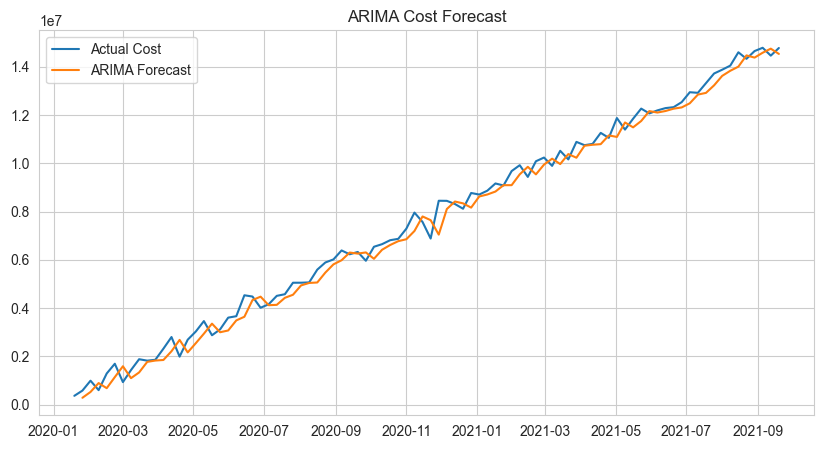

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(proj_df.index, proj_df["Actual_Cost"], label="Actual Cost")
plt.plot(proj_df.index, proj_df["ARIMA_Forecast"], label="ARIMA Forecast")
plt.title("ARIMA Cost Forecast")
plt.legend()
plt.show()


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = proj_df["Actual_Cost"].iloc[1:]
y_pred = proj_df["ARIMA_Forecast"].iloc[1:]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("ARIMA MAE:", mae)
print("ARIMA RMSE:", rmse)


ARIMA MAE: 349344.8657225434
ARIMA RMSE: 424028.4678554665
